# **CNN Time Series Classification**

**Imports**

In [ ]:
import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

**Loading Dataset**

In [2]:
df = pd.read_csv("../Datasets/META stocks.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-05-18,42.049999,45.000000,38.000000,38.230000,38.084515,573576400
1,2012-05-21,36.529999,36.660000,33.000000,34.029999,33.900501,168192700
2,2012-05-22,32.610001,33.590000,30.940001,31.000000,30.882032,101786600
3,2012-05-23,31.370001,32.500000,31.360001,32.000000,31.878227,73600000
4,2012-05-24,32.950001,33.209999,31.770000,33.029999,32.904308,50237200


In [3]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3186.000000,3186.000000,3186.000000,3186.000000,3186.000000,3.186000e+03
mean,186.993983,189.388905,184.632693,187.066114,186.438467,2.928538e+07
std,132.340763,133.933605,130.660796,132.345106,132.074638,2.575548e+07
min,18.080000,18.270000,17.549999,17.730000,17.662531,4.726100e+06
25%,88.697502,89.837500,87.494997,88.410002,88.073563,1.542828e+07
50%,165.914993,168.315002,163.750000,166.010002,165.378258,2.167915e+07
75%,246.732498,250.099995,244.490002,246.822506,245.883259,3.341255e+07
max,631.700012,638.400024,627.210022,632.679993,632.170044,5.735764e+08


**Checking for Duplicates and Missing values**

In [4]:
df.duplicated().sum()

np.int64(0)

In [5]:
df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

**Dropping Unnecessary columns**

In [6]:
df = df.drop(['Open', 'High', 'Low', 'Adj Close' ], axis=1)
df.head()

,Date,Close,Volume
0,2012-05-18,38.230000,573576400
1,2012-05-21,34.029999,168192700
2,2012-05-22,31.000000,101786600
3,2012-05-23,32.000000,73600000
4,2012-05-24,33.029999,50237200


**Scaling Variables**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
num_cols = ['Close', 'Volume']
df[num_cols] = scaler.fit_transform(df[num_cols])

In [8]:
df.head()

,Date,Close,Volume
0,2012-05-18,0.033336,1.000000
1,2012-05-21,0.026506,0.287363
2,2012-05-22,0.021579,0.170626
3,2012-05-23,0.023205,0.121076
4,2012-05-24,0.024880,0.080005


**Converting Dates into sequence**

In [ ]:
df['sequence'] = df.index + 1
df = df.drop(['Date'], axis=1)

In [10]:
df.head()

,Close,Volume,sequence
0,0.033336,1.000000,1
1,0.026506,0.287363,2
2,0.021579,0.170626,3
3,0.023205,0.121076,4
4,0.024880,0.080005,5


**Creating Time Windows**

In [12]:
from numpy.lib.stride_tricks import sliding_window_view


close_arr  = df['Close'].values
volume_arr = df['Volume'].values

close_windows  = sliding_window_view(close_arr, window_shape=50)
volume_windows = sliding_window_view(volume_arr, window_shape=50)

X = np.vstack((close_windows, volume_windows))
y = np.array([0] * len(close_windows) + [1] * len(volume_windows))

print("X:", X.shape)
print("y:", y.shape)


X: (6274, 50)
y: (6274,)


**Shuffling**

In [13]:
from sklearn.utils import shuffle

X, y = shuffle(X, y, random_state=42)


**Visualizing Test Signals**

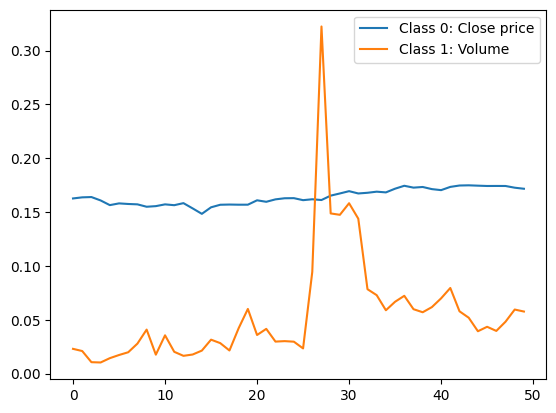

In [14]:
test_signal_index = 9

c_x_train = X[y == 0]
plt.plot(c_x_train[test_signal_index], label="Class 0: Close price")

c_x_train = X[y == 1]
plt.plot(c_x_train[test_signal_index], label="Class 1: Volume")
plt.legend()

**Train/Test Split**

In [ ]:
train_size = 0.7
splitter = int(len(X) * train_size)
x_train = X[0:splitter]
x_test = X[splitter:]
y_train = y[0:splitter]
y_test = y[splitter:]

In [16]:

print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

4391
1883
4391
1883


**Reshaping Data for CNN**

In [ ]:
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))

In [18]:
x_train

array([[[0.1113583 ],
        [0.08444963],
        [0.11549278],
        ...,
        [0.14271575],
        [0.12459499],
        [0.08650237]],

       [[0.27602245],
        [0.28060817],
        [0.29395886],
        ...,
        [0.28215303],
        [0.29415399],
        [0.29646312]],

       [[0.2896333 ],
        [0.2902675 ],
        [0.28716157],
        ...,
        [0.24949997],
        [0.24302788],
        [0.2354663 ]],

       ...,

       [[0.19596716],
        [0.19686153],
        [0.19817873],
        ...,
        [0.21473291],
        [0.20671601],
        [0.21128548]],

       [[0.03426016],
        [0.04231465],
        [0.03945818],
        ...,
        [0.06441783],
        [0.03968689],
        [0.0588705 ]],

       [[0.02775862],
        [0.0270769 ],
        [0.02550003],
        ...,
        [0.04684554],
        [0.08086275],
        [0.0747854 ]]], shape=(4391, 50, 1))

**CNN-time series classification network**

In [ ]:
class_names = np.array(['Close price', 'Volume'])
num_classes = len(class_names)
classes = [0, 1]

def make_model(input_shape):
    model = keras.Sequential(
        [
            keras.layers.Input(input_shape),
            keras.layers.Conv1D(filters=64, kernel_size=3, padding="same"),
            keras.layers.BatchNormalization(),
            keras.layers.ReLU(),
            keras.layers.GlobalAveragePooling1D(),
            keras.layers.Flatten(),
            keras.layers.Dense(64, activation="relu"),
            keras.layers.Dense(num_classes, activation="softmax")
        ]
    )

    return model


model = make_model(input_shape=x_train.shape[1:])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 50, 64)         │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 50, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu (ReLU)                    │ (None, 50, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ (None, 64)             │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,802 (18.76 KB)

 Trainable params: 4,674 (18.26 KB)

 Non-trainable params: 128 (512.00 B)

**Training**

In [20]:
epochs = 500
batch_size = 32

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model1.keras", save_best_only=True, monitor="val_loss"
    )
]
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"],
)
history = model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.2,
    verbose=1,
)

Epoch 1/500
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3739 - sparse_categorical_accuracy: 0.8374 - val_loss: 0.6441 - val_sparse_categorical_accuracy: 0.4960
Epoch 2/500
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3116 - sparse_categorical_accuracy: 0.8616 - val_loss: 0.6524 - val_sparse_categorical_accuracy: 0.4960
Epoch 3/500
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2458 - sparse_categorical_accuracy: 0.8989 - val_loss: 0.8284 - val_sparse_categorical_accuracy: 0.4960
Epoch 4/500
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1664 - sparse_categorical_accuracy: 0.9402 - val_loss: 0.8157 - val_sparse_categorical_accuracy: 0.4960
Epoch 5/500
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1181 - sparse_categorical_accuracy: 0.9675 - val_loss: 0.2645 - val_sparse_categorical_accuracy: 0.9477
Epoch 6/500
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0899 - sparse_categorical_accuracy: 0.9758 - val_loss: 1.1390 - val_sparse_categorical_accuracy: 0.715

**Metrics and Plots**

<Axes: >

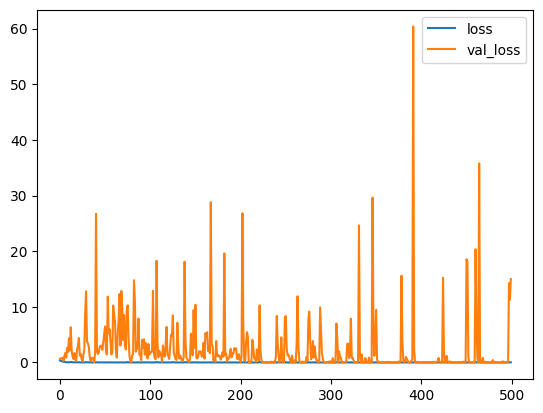

In [21]:
loss_df = pd.DataFrame(model.history.history)
loss_df[['loss', 'val_loss']].plot()

<Axes: >

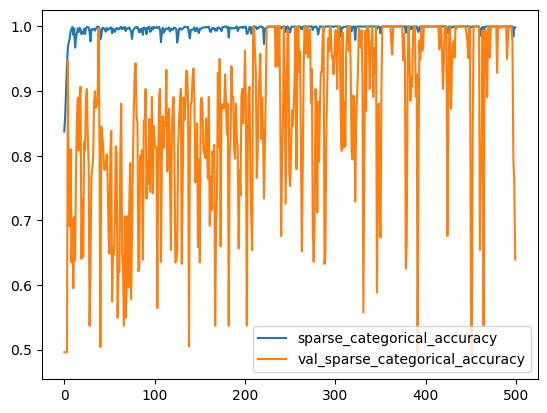

In [22]:
loss_df[['sparse_categorical_accuracy', 'val_sparse_categorical_accuracy']].plot()


In [23]:
model = keras.models.load_model("best_model1.keras")

In [24]:
print("Test data evaluation:")
print(model.evaluate(x_test, y_test, verbose=0))
print("\nTrain data evaluation:")
print(model.evaluate(x_train, y_train, verbose=0))

Test data evaluation:
[3.419532367843203e-05, 1.0]

Train data evaluation:
[2.7073574528913014e-05, 1.0]


In [ ]:
test_predictions = model.predict(x_test)
test_predictions = np.argmax(test_predictions, axis=1)

59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


<Axes: >

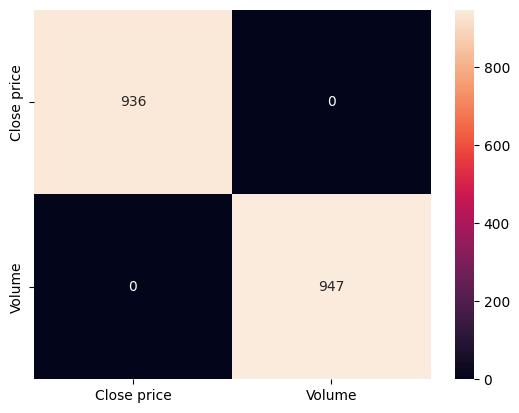

In [ ]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, test_predictions), annot=True, fmt='g', 
            xticklabels=class_names, yticklabels=class_names)

In [ ]:
print(classification_report(y_test, test_predictions, target_names=class_names))
acc = accuracy_score(y_test, test_predictions)
print("\nModel overall accuracy: {:.2f}%".format(acc * 100))

              precision    recall  f1-score   support

 Close price       1.00      1.00      1.00       936
      Volume       1.00      1.00      1.00       947

    accuracy                           1.00      1883
   macro avg       1.00      1.00      1.00      1883
weighted avg       1.00      1.00      1.00      1883


Model overall accuracy: 100.00%


In [32]:
roc_auc_score(y_test, model.predict(x_test)[:, 1])

59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 707us/step


1.0

**Test with Imaginary Values**

ChatGPT used to create synthetic signals

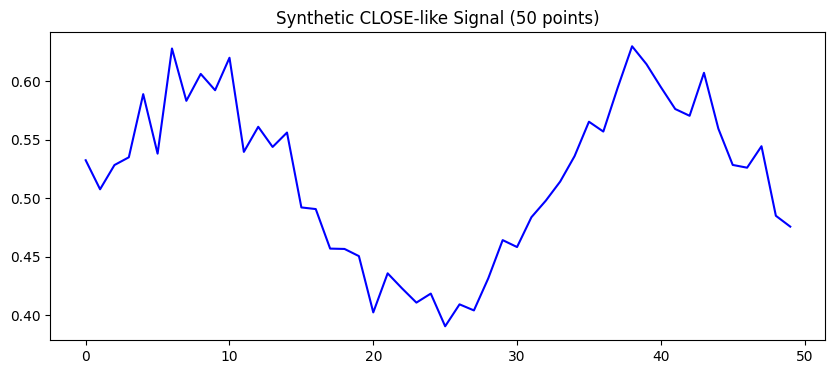

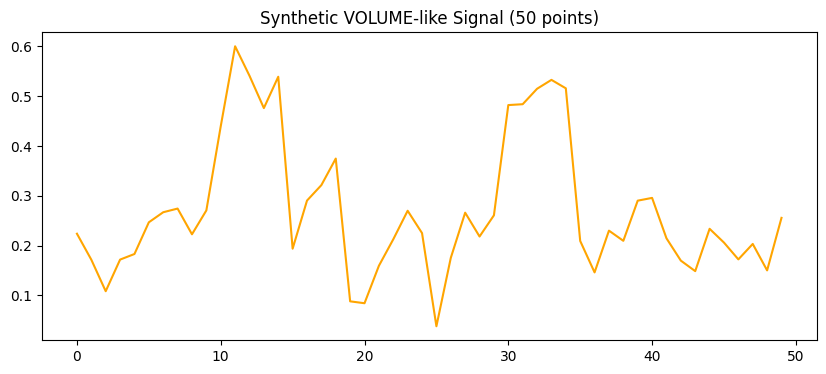

In [30]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(50)
np.random.seed(1)

y_close_fake = 0.5 + 0.1*np.sin(x / 5) + np.random.normal(0, 0.02, size=50)
y_close_fake = np.clip(y_close_fake, 0, 1)
plt.figure(figsize=(10,4))
plt.plot(x, y_close_fake, label="Synthetic CLOSE Signal", color="blue")
plt.title("Synthetic CLOSE-like Signal (50 points)")
plt.show()

y_volume_fake = 0.2 + np.random.normal(0, 0.08, size=50)
y_volume_fake[10:15] += 0.3
y_volume_fake[30:35] += 0.3
y_volume_fake = np.clip(y_volume_fake, 0, 1)
plt.figure(figsize=(10,4))
plt.plot(x, y_volume_fake, label="Synthetic VOLUME Signal", color="orange")
plt.title("Synthetic VOLUME-like Signal (50 points)")
plt.show()

In [31]:
def prepare_signal(sig):
    sig = np.expand_dims(sig, axis=1)
    return np.array([sig])

batch_close = prepare_signal(y_close_fake)
batch_volume = prepare_signal(y_volume_fake)

pred_close = model.predict(batch_close)
pred_volume = model.predict(batch_volume)

print(pred_close, "Prediction:", class_names[np.argmax(pred_close)])
print(pred_volume, "Prediction:", class_names[np.argmax(pred_volume)])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
[[1. 0.]] Prediction: Close price
[[1.5787849e-34 1.0000000e+00]] Prediction: Volume


**Summary**

CNN was able to predict the difference of pattern of closing price and volume as the closing prices trend is more smooth and stable  rather than volume which has higher spikes. The model overfits a bit but its because of simple and small dataset but in testing with imagionary signals it is able to predict accurately